# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API

#### Pegar a Cotação Atual de Todas as Moedas

In [ ]:
import requests, json
from pprint import pprint

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/all")
cotacoes_dic = cotacoes.json()

pprint(cotacoes_dic)

{'ARS': {'ask': '0.0061',
         'bid': '0.0061',
         'code': 'ARS',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:16:21',
         'high': '0.0062',
         'low': '0.006',
         'name': 'Peso Argentino/Real Brasileiro',
         'pctChange': '1.66',
         'timestamp': '1719857781',
         'varBid': '0.0001'},
 'AUD': {'ask': '3.7381',
         'bid': '3.7332',
         'code': 'AUD',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:16:25',
         'high': '3.7388',
         'low': '3.6583',
         'name': 'Dólar Australiano/Real Brasileiro',
         'pctChange': '1.95',
         'timestamp': '1719857785',
         'varBid': '0.0716'},
 'BTC': {'ask': '357700',
         'bid': '357283',
         'code': 'BTC',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:15:21',
         'high': '357700',
         'low': '345994',
         'name': 'Bitcoin/Real Brasileiro',
         'pctChange': '3.13',
         'timestamp': '1

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [ ]:
import requests, json, locale
from time import ctime

cotacoes = requests.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")
cotacoes_dic = cotacoes.json()
data = ctime(int(cotacoes_dic['USDBRL']['timestamp']))

for chave in cotacoes_dic:
  print(f"Cotação {chave[:3]}: R$ {float(cotacoes_dic[chave]['bid']):,.3f}")

print(f"\nHorário da cotação: {data}")

Cotação USD: R$ 5.471
Cotação EUR: R$ 5.888
Cotação BTC: R$ 311,436.000

Horário da cotação: Mon Jul  8 21:26:34 2024


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [ ]:
import requests, json
from time import ctime
from pprint import pprint
from datetime import datetime as dt

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30")
cotacoes_lista = cotacoes.json()

#pprint(cotacoes_lista)


for dic in cotacoes_lista:
  data = ctime(int(dic["timestamp"]))
  data_formatada = dt.strptime(data, "%a %b %d %H:%M:%S %Y")

  print(f"{data_formatada.date()}: {dic['bid']}")


2024-07-08: 5.4714
2024-07-08: 5.4714
2024-07-07: 5.4594
2024-07-05: 5.4592
2024-07-05: 5.4596
2024-07-04: 5.4852
2024-07-03: 5.5523
2024-07-02: 5.6759
2024-07-01: 5.6568
2024-06-28: 5.5925
2024-06-28: 5.593
2024-06-27: 5.5014
2024-06-26: 5.524
2024-06-25: 5.4511
2024-06-24: 5.39
2024-06-21: 5.4301
2024-06-21: 5.4321
2024-06-20: 5.4537
2024-06-19: 5.4269
2024-06-18: 5.44
2024-06-17: 5.4245
2024-06-16: 5.3757
2024-06-14: 5.3757
2024-06-14: 5.3757
2024-06-13: 5.3638
2024-06-12: 5.4017
2024-06-11: 5.3668
2024-06-10: 5.3545
2024-06-09: 5.353
2024-06-07: 5.3436


In [ ]:
import requests, json
from time import ctime
from datetime import datetime as dt

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30")
cotacoes_lista = cotacoes.json()

for dic in cotacoes_lista[1:]:
  data = ctime(int(dic["timestamp"]))
  data_formatada = dt.strptime(data, "%a %b %d %H:%M:%S %Y")

  print(f"{data_formatada.date()}: {dic['bid']}")


2024-07-08: 5.4689
2024-07-07: 5.4569
2024-07-05: 5.4569
2024-07-05: 5.4569
2024-07-04: 5.466
2024-07-03: 5.5402
2024-07-02: 5.6695
2024-07-01: 5.657
2024-06-28: 5.4861
2024-06-28: 5.4861
2024-06-27: 5.5019
2024-06-26: 5.518
2024-06-25: 5.4504
2024-06-24: 5.39
2024-06-21: 5.4232
2024-06-21: 5.4232
2024-06-20: 5.4486
2024-06-19: 5.4242
2024-06-18: 5.4349
2024-06-17: 5.4194
2024-06-16: 5.3439
2024-06-14: 5.3439
2024-06-14: 5.3439
2024-06-13: 5.3601
2024-06-12: 5.4015
2024-06-11: 5.365
2024-06-10: 5.353
2024-06-09: 5.2416
2024-06-07: 5.2416


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [1]:
import requests, json
from time import ctime
from datetime import datetime as dt

data1 = dt(2020, 1, 1)
data2 = dt(2020, 10, 31)
dif = (data2 - data1).days

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/daily/BTC-BRL/" + str(dif) +"?start_date=20200101&end_date=20201031")
cotacoes_lista = cotacoes.json()

print(dif, "\n")

for dic in cotacoes_lista[1:]:
  data = ctime(int(dic["timestamp"]))
  data_formatada = dt.strptime(data, "%a %b %d %H:%M:%S %Y")

  print(f"{data_formatada.date()}: {dic['bid']}")

304 

2020-10-30: 78101
2020-10-29: 77950.2
2020-10-28: 76550.1
2020-10-27: 77888.1
2020-10-26: 73685.5
2020-10-25: 73200
2020-10-24: 73300
2020-10-23: 72202.4
2020-10-22: 72251.2
2020-10-21: 71401
2020-10-20: 66952.4
2020-10-19: 66000.3
2020-10-18: 64950.1
2020-10-17: 64500
2020-10-16: 64400
2020-10-15: 65000
2020-10-14: 64100.6
2020-10-13: 63601.7
2020-10-12: 63558.3
2020-10-11: 62701
2020-10-10: 62747.2
2020-10-09: 61960
2020-10-08: 61211.5
2020-10-07: 60265
2020-10-06: 59801
2020-10-05: 60210.3
2020-10-04: 60569.2
2020-10-03: 60018.1
2020-10-02: 60512.5
2020-10-01: 60390.7
2020-09-30: 60950.1
2020-09-29: 60995
2020-09-28: 60600.1
2020-09-27: 59638.4
2020-09-26: 59720.5
2020-09-25: 59845
2020-09-24: 59501.1
2020-09-23: 57884
2020-09-22: 57880.5
2020-09-21: 57050.6
2020-09-20: 59100
2020-09-19: 59750
2020-09-18: 59285
2020-09-17: 57807.2
2020-09-16: 58250
2020-09-15: 57700
2020-09-14: 56908.9
2020-09-13: 55566
2020-09-12: 55856.7
2020-09-11: 55821.2
2020-09-10: 55511
2020-09-09: 5505

#### Gráfico com as cotações do BitCoin

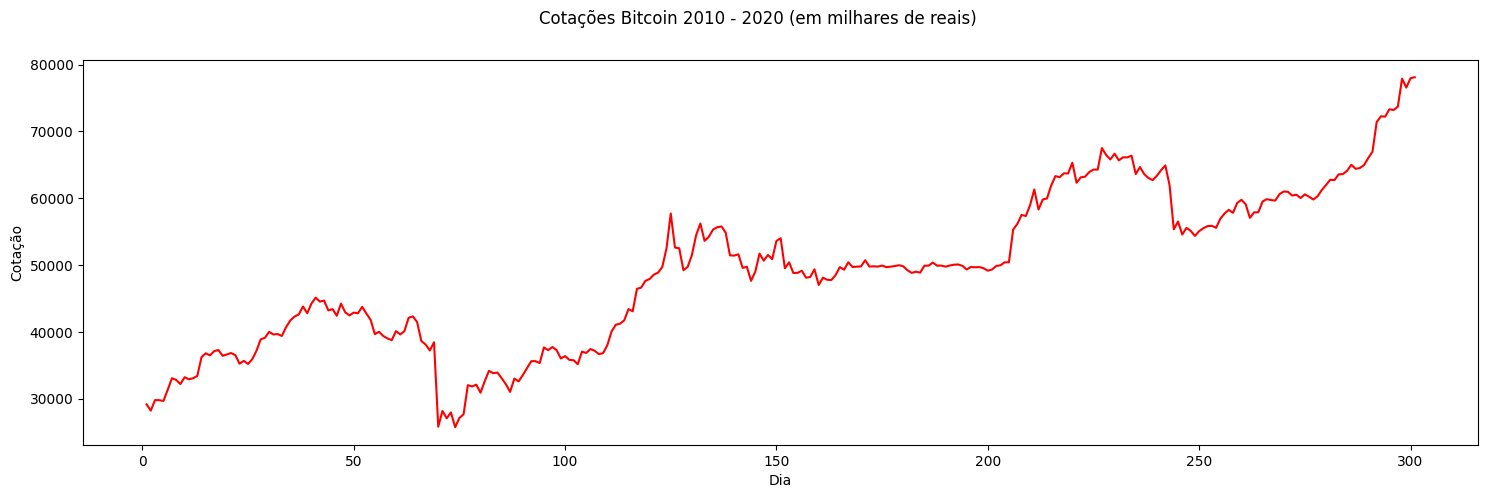

In [2]:
import matplotlib.pyplot as plt

cotacoes = [float(dic["bid"]) for dic in cotacoes_lista[1:]]
cotacoes.reverse()
eixo_x = range(1, dif - 2)


#Construção do gráfico
plt.figure(figsize=(18, 5))
plt.plot(eixo_x, cotacoes, '-r')
plt.ylabel("Cotação")
plt.xlabel("Dia")
plt.suptitle("Cotações Bitcoin 2010 - 2020 (em milhares de reais)")

plt.show()